In [146]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [147]:
# Load the data
file_path = "accident_data.csv"  # Update this with the actual file path
df = pd.read_csv(file_path)
print(f"Initial dataset size: {df.shape}")

Initial dataset size: (324, 11)


In [148]:

# Convert "Incident Date" to datetime and calculate days after August 1, 2022
reference_date = datetime(2022, 8, 1)
df["Incident Date"] = pd.to_datetime(df["Incident Date"], format="%m/%d/%Y", errors='coerce')
df = df[df["Incident Date"] >= reference_date]
df["Days After Reference"] = (df["Incident Date"] - reference_date).dt.days

print(f"Initial dataset size: {df.shape}")

Initial dataset size: (318, 12)


In [9]:

# Filter rows where "Is NHTSA Reportable In-Transport" is TRUE

df["Is NHTSA Reportable In-Transport"] = df["Is NHTSA Reportable In-Transport"].astype(str).str.strip().str.title()
df = df[df["Is NHTSA Reportable In-Transport"] == "True"]

print(f"Initial dataset size: {df.shape}")

Initial dataset size: (295, 12)


In [150]:
# Compute Severity Score
df["Severity Score"] = 0

df["Is Airbag Deployment"] = df["Is Airbag Deployment"].astype(str).str.strip().str.title()
df["Is Any-Injury-Reported"] = df["Is Any-Injury-Reported"].astype(str).str.strip().str.title()

df.loc[df["Is Airbag Deployment"] == "True", "Severity Score"] += 5
df.loc[df["Is Any-Injury-Reported"] == "True", "Severity Score"] += 8

print(f"Initial dataset size: {df.shape}")

Initial dataset size: (295, 13)


In [151]:

# Prepare data for regression
X = df[["Days After Reference"]].values
y = df["Severity Score"].values

print(f"Initial dataset size: {df.shape}")

Initial dataset size: (295, 13)


In [152]:

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

print(f"Initial dataset size: {df.shape}")

Initial dataset size: (295, 13)


In [153]:

# Print regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

print(f"Initial dataset size: {df.shape}")

Intercept: 1.1357743982675679
Slope: -0.0002823300495181964
Initial dataset size: (295, 13)


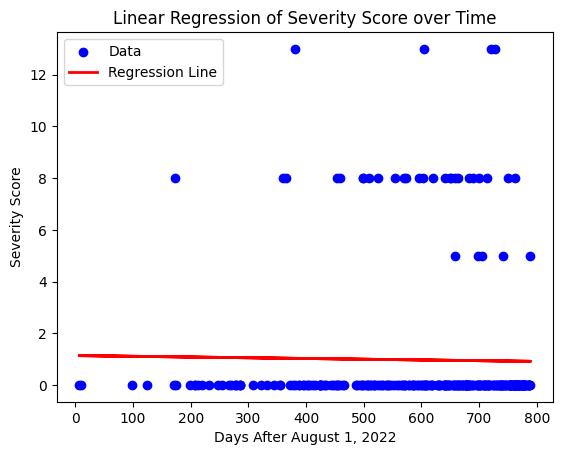

Initial dataset size: (295, 13)


In [154]:

# Plot the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Days After August 1, 2022")
plt.ylabel("Severity Score")
plt.title("Linear Regression of Severity Score over Time")
plt.legend()
plt.show()

print(f"Initial dataset size: {df.shape}")

In [155]:
file_path = "accident_data.csv"  # Update this with the actual file path
df = pd.read_csv(file_path)
print(f"Initial dataset size: {df.shape}")
print(df.head())


Initial dataset size: (324, 11)
  SGO Report ID  Year Month       Location  Is NHTSA Reportable In-Transport  \
0    30270-8887      202409        PHOENIX                             False   
1    30270-8886      202409    LOS_ANGELES                              True   
2    30270-8885      202409  SAN_FRANCISCO                              True   
3    30270-8884      202409  SAN_FRANCISCO                              True   
4    30270-8883      202409         AUSTIN                              True   

   Is NHTSA Reportable In-Transport Delta-V Less than 1 MPH  \
0                                              False          
1                                              False          
2                                               True          
3                                               True          
4                                               True          

   Is Police-Reported  Is Any-Injury-Reported  Is Airbag Deployment  \
0               False                

In [156]:


# Convert "Incident Date" to datetime and calculate days after August 1, 2022
reference_date = datetime(2022, 8, 1)
df["Incident Date"] = pd.to_datetime(df["Incident Date"], format="%m/%d/%Y", errors='coerce')
df = df[df["Incident Date"] >= reference_date]
df["Days After Reference"] = (df["Incident Date"] - reference_date).dt.days

# Debug: Check if any dates failed to convert (resulting in NaT).
if df['Incident Date'].isnull().any():
    print("Warning: Some dates could not be converted. Here are the rows with NaT values:")
    print(df[df['Incident Date'].isnull()])

# Drop rows where the date conversion failed (if any).
df = df.dropna(subset=['Incident Date'])

# Ensure the DataFrame is not empty after dropping bad rows.
if df.empty:
    raise ValueError("No valid 'Incident Date' values found after conversion.")

# Sort the DataFrame by 'Incident Date'.
df.sort_values(by='Incident Date', inplace=True)

# Debug: Print the first and last dates.
first_date = df['Incident Date'].iloc[0]
last_date = df['Incident Date'].iloc[-1]
print("First date:", first_date)
print("Last date:", last_date)

# Calculate the observation period in days.
observation_period = (last_date - first_date).days
print("Observation period (days):", observation_period)

# Check if the observation period is zero.
if observation_period == 0:
    raise ValueError("Observation period is zero. Check your accident date data.")

# Estimate the accident rate (lambda) as the number of accidents per day.
lambda_estimated = len(df) / observation_period
print(f"Estimated accident rate (lambda): {lambda_estimated:.3f} accidents per day")

# Define a future time interval (in days) for which we want to compute probabilities.
t_future = 1 # e.g., next 1 day
lambda_future = lambda_estimated * t_future
print(f"Lambda for future interval (t={t_future} day): {lambda_future:.3f}")

# Compute the probability of observing k accidents in the future time interval.
k_values = np.arange(0, 11)  # For k = 0 to 10 accidents
pmf_values = poisson.pmf(k_values, lambda_future)

# Debug: Print computed k_values and pmf_values.
print("k values:", k_values)
print("PMF values:", pmf_values)

# Plot the Poisson PMF using a bar chart for clarity.
plt.figure(figsize=(8, 5))
plt.bar(k_values, pmf_values, color='skyblue', edgecolor='black')
plt.xlabel("Number of Accidents in Next Day")
plt.ylabel("Probability")
plt.title("Poisson Process: Probability of Car Accidents")
plt.grid(axis='y')
plt.show()
